# P4 - Building A Regression Model

- **Author:** Deb St. Cyr
- **Date:** November 2025

## **Introduction**
In this lab, I apply the regression modeling process introduced in the Howell example to a new dataset: the Titanic passenger data. The goal of this project is to practice selecting features, building multiple regression models, and evaluating how well they predict a continuous target variable. While the Howell lab provided a guided demonstration of model building, this assignment requires implementing the workflow independently, including developing multiple feature cases, fitting several scikit-learn regression models, and comparing performance across approaches.
This project also reinforces technical skills such as organizing a notebook with clear, numbered sections; importing all libraries at the top; evaluating error metrics; and documenting results. By the end of this lab, I will summarize which feature set and model performed best and reflect on the challenges encountered during the process.

### Section 2 - Load Data & Initial Exploration

#### 2.1 Import Libraries
All required libraries are imported here at the top, as instructed in the assignment.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

sns.set(style="whitegrid")


#### 2.2 Load Titanic dataset
Loading the dataset using pandas.


In [2]:
df = sns.load_dataset("titanic")
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#### 2.3 Basic dataset preview
Basic dataset inspection to understand structure, missing values, and data types.

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
df.describe(include="all")


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 2.4 Missing Values
Checking for any missing values that may need to be handled before modeling.


In [5]:
df.isna().sum()


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

#### 2.5 Basic Visualizations
A few simple plots to understand variable distributions.


##### Histogram of Fare

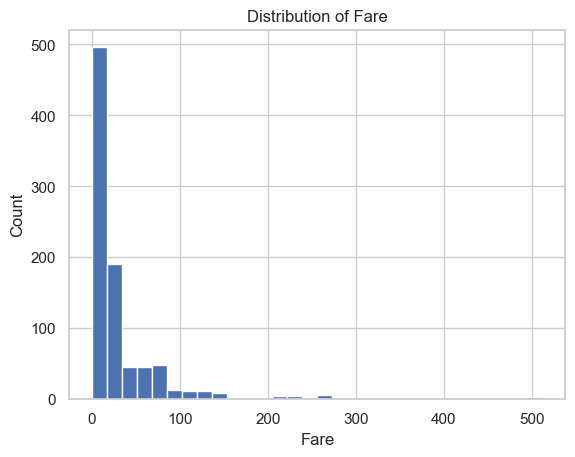

In [6]:
plt.hist(df['fare'], bins=30)
plt.title("Distribution of Fare")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()


##### Histogram of Age

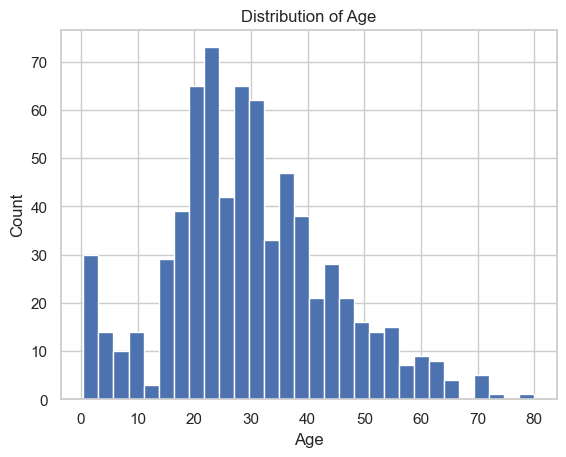

In [7]:
df['age'].dropna().hist(bins=30)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


## Section 3 - Feature Cases

#### 3.1 Case 1 – Base Features
For Case 1, I am starting with a simple set of base features.  
These are features that require little or no preprocessing and are commonly used in Titanic regression examples.


In [8]:
# Case 1 – Base features
case1 = df[['pclass', 'sibsp', 'parch', 'fare']].dropna()

X1 = case1[['pclass', 'sibsp', 'parch']]
y1 = case1['fare']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)


#### 3.2 Case 2 – Add Engineered Feature (FamilySize)
Adding an engineered feature to improve model performance.  
FamilySize combines information from siblings/spouses and parents/children.


In [9]:
df['FamilySize'] = df['sibsp'] + df['parch'] + 1

case2 = df[['pclass', 'sibsp', 'parch', 'FamilySize', 'fare']].dropna()

X2 = case2[['pclass', 'sibsp', 'parch', 'FamilySize']]
y2 = case2['fare']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)


#### 3.3 Case 3 – Another Engineered Feature (FarePerPerson)
In Case 3, I extend Case 2 by adding an additional engineered feature: FarePerPerson.
This models the idea that group size affects ticket cost.


In [10]:
df['FarePerPerson'] = df['fare'] / df['FamilySize']

case3 = df[['pclass', 'sibsp', 'parch', 'FamilySize', 'FarePerPerson', 'fare']].dropna()

X3 = case3[['pclass', 'sibsp', 'parch', 'FamilySize', 'FarePerPerson']]
y3 = case3['fare']

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)


#### 3.4 Case 4 – Best Feature Set
Case 4 represents the feature set that I believe will perform the best
based on exploratory analysis and results from the earlier cases.


In [11]:
case4 = df[['pclass', 'FamilySize', 'FarePerPerson', 'fare']].dropna()

X4 = case4[['pclass', 'FamilySize', 'FarePerPerson']]
y4 = case4['fare']

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=42)


### Section 4 Reusable Evaluation Function

#### 4.1 Helper Function for Evaluating Models
To keep the notebook organized, a reusable function is created to fit a model,
generate predictions, and compute the key performance metrics (MAE, MSE, RMSE, R²).


In [13]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    """Fit a model and return metrics in a dictionary."""
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    mae = mean_absolute_error(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, preds)

    return {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2": r2
    }


#### 4.2 Create a Results Dictionary
This dictionary will collect the performance metrics for each case and model.


In [20]:
results = {
    "Case 1": {},
    "Case 2": {},
    "Case 3": {},
    "Case 4": {}
}


#### 4.3 Linear Regression
Applying Linear Regression to all four feature cases.


In [26]:
lr = LinearRegression()

results["Case 1"]["LinearRegression"] = evaluate_model(lr, X1_train, X1_test, y1_train, y1_test)
results["Case 2"]["LinearRegression"] = evaluate_model(lr, X2_train, X2_test, y2_train, y2_test)
results["Case 3"]["LinearRegression"] = evaluate_model(lr, X3_train, X3_test, y3_train, y3_test)
results["Case 4"]["LinearRegression"] = evaluate_model(lr, X4_train, X4_test, y4_train, y4_test)


#### 4.4 Ridge Regression
Ridge Regression adds L2 regularization to reduce overfitting.


In [31]:
ridge = Ridge(alpha=1.0)

results["Case 1"]["Ridge"] = evaluate_model(ridge, X1_train, X1_test, y1_train, y1_test)
results["Case 2"]["Ridge"] = evaluate_model(ridge, X2_train, X2_test, y2_train, y2_test)
results["Case 3"]["Ridge"] = evaluate_model(ridge, X3_train, X3_test, y3_train, y3_test)
results["Case 4"]["Ridge"] = evaluate_model(ridge, X4_train, X4_test, y4_train, y4_test)


#### 4.5 ElasticNet Regression
ElasticNet combines both L1 (Lasso) and L2 (Ridge) penalties.


In [35]:
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)

results["Case 1"]["ElasticNet"] = evaluate_model(elastic, X1_train, X1_test, y1_train, y1_test)
results["Case 2"]["ElasticNet"] = evaluate_model(elastic, X2_train, X2_test, y2_train, y2_test)
results["Case 3"]["ElasticNet"] = evaluate_model(elastic, X3_train, X3_test, y3_train, y3_test)
results["Case 4"]["ElasticNet"] = evaluate_model(elastic, X4_train, X4_test, y4_train, y4_test)


#### 4.6 Polynomial Regression (Degree 2)
Polynomial regression expands the feature space to capture non-linear relationships.


In [38]:
poly = PolynomialFeatures(degree=2, include_bias=False)

# Case 1
X1_poly = poly.fit_transform(X1_train)
X1_poly_test = poly.transform(X1_test)
poly_lr = LinearRegression()
results["Case 1"]["Polynomial"] = evaluate_model(poly_lr, X1_poly, X1_poly_test, y1_train, y1_test)

# Case 2
X2_poly = poly.fit_transform(X2_train)
X2_poly_test = poly.transform(X2_test)
results["Case 2"]["Polynomial"] = evaluate_model(poly_lr, X2_poly, X2_poly_test, y2_train, y2_test)

# Case 3
X3_poly = poly.fit_transform(X3_train)
X3_poly_test = poly.transform(X3_test)
results["Case 3"]["Polynomial"] = evaluate_model(poly_lr, X3_poly, X3_poly_test, y3_train, y3_test)

# Case 4
X4_poly = poly.fit_transform(X4_train)
X4_poly_test = poly.transform(X4_test)
results["Case 4"]["Polynomial"] = evaluate_model(poly_lr, X4_poly, X4_poly_test, y4_train, y4_test)


#### 4.7 Results Dictionary

In [39]:
results


{'Case 1': {'LinearRegression': {'MAE': 19.907029102427966,
   'MSE': 951.2000371454595,
   'RMSE': np.float64(30.84153104412068),
   'R2': 0.38530319880068153},
  'Ridge': {'MAE': 19.87128111112553,
   'MSE': 950.1846761701972,
   'RMSE': np.float64(30.825065712341917),
   'R2': 0.3859593585138681},
  'ElasticNet': {'MAE': 18.700562299306544,
   'MSE': 921.7602110614822,
   'RMSE': np.float64(30.360504130555576),
   'R2': 0.4043281843084542},
  'Polynomial': {'MAE': 15.898726555898955,
   'MSE': 837.215826887451,
   'RMSE': np.float64(28.934682076833866),
   'R2': 0.45896355066851247}},
 'Case 2': {'LinearRegression': {'MAE': 19.907029102427966,
   'MSE': 951.2000371454594,
   'RMSE': np.float64(30.841531044120675),
   'R2': 0.38530319880068165},
  'Ridge': {'MAE': 19.87488258139235,
   'MSE': 950.2169374447119,
   'RMSE': np.float64(30.82558900401924),
   'R2': 0.385938510215432},
  'ElasticNet': {'MAE': 18.814829558740033,
   'MSE': 922.125904024777,
   'RMSE': np.float64(30.3665260